In [1]:
import torch
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
import requests
from transformers import pipeline
import os

def show_masks(image, masks):
    """
    Helper function to display the image with masks overlaid.
    """
    plt.figure(figsize=(10, 10))
    plt.imshow(image)
    ax = plt.gca()
    ax.set_autoscale_on(False)

    # Iterate through each mask and overlay it
    for mask in masks:
        # Convert PIL mask to numpy array (boolean)
        m = np.array(mask) > 0 
        
        # Generate a random color for this mask
        color = np.concatenate([np.random.random(3), [0.6]]) # [R, G, B, Alpha]
        
        # Create a colored mask image
        h, w = m.shape
        mask_image = m.reshape(h, w, 1) * color.reshape(1, 1, -1)
        
        # Overlay the mask
        ax.imshow(mask_image)

    plt.axis('off')
    plt.show()

/shared/ssd_28T/home/yl535/anaconda3/envs/sam3d-objects/lib/python3.11/site-packages/torch/cuda/__init__.py:61: FutureWarning: The pynvml package is deprecated. Please install nvidia-ml-py instead. If you did not install pynvml directly, please report this to the maintainers of the package that installed pynvml for you.
  import pynvml  # type: ignore[import]


Device set to use cuda:0


Generated 42 masks.


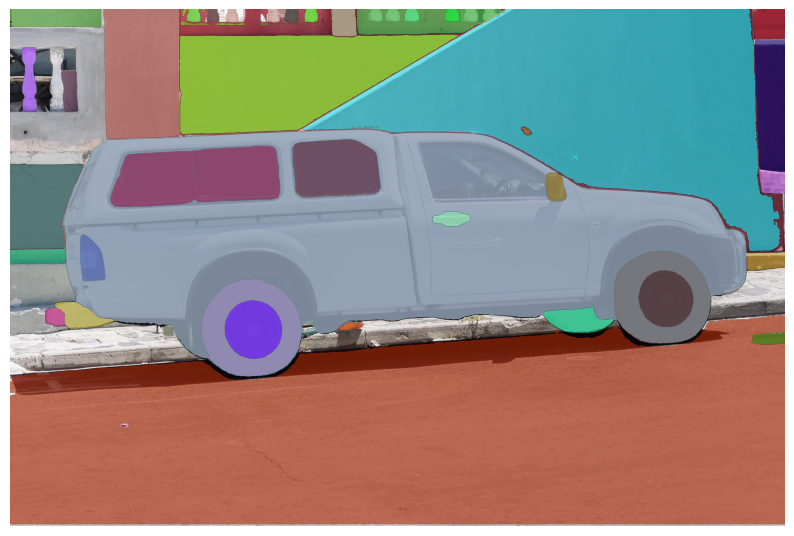

In [ ]:
# 1. Initialize the pipeline
# Use device=0 for GPU, device=-1 for CPU
device = 0 if torch.cuda.is_available() else -1
generator = pipeline(
    "mask-generation", 
    model="facebook/sam2-hiera-large", 
    device=device,
    torch_dtype=torch.float32 
)

# 2. Load the image
url = "https://huggingface.co/datasets/hf-internal-testing/sam2-fixtures/resolve/main/truck.jpg"
image = Image.open(requests.get(url, stream=True).raw).convert("RGB")


image = load_image(IMAGE_PATH)

# 3. Generate masks
# 'points_per_batch' manages memory usage. Reduce it (e.g., to 32) if you run out of VRAM.
outputs = generator(image, points_per_batch=64)

# The pipeline returns a dict: {'masks': [PIL.Image], 'scores': [...]}
masks = outputs["masks"]

print(f"Generated {len(masks)} masks.")

# 4. Visualize
show_masks(image, masks)

In [2]:
import transformers
print(transformers.__version__)

4.57.1
